# Hands-on-session 3: Driven turbulence

In [7]:
##### This file contains some useful python code that
##### helps you to work through the exercise sheet.

### Time series analysis

In [8]:
# Import python packages
import pencil as pc  # the pencil code packages
import matplotlib.pyplot as plt   # for plotting the data

In [9]:
# Read in time series
ts = pc.read.ts(datadir='../data')

Read 250 lines.


In [10]:
# Pick out some quantities from the time series:
t = ts.t       # simulation time 
brms = ts.brms # rms magnetic field strength
urms = ts.urms # rms velocity

/Users/jennifer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


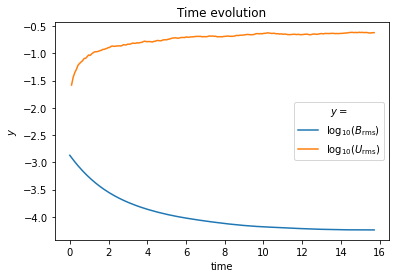

In [11]:
# Plot:
f = plt.figure()

plt.plot(t,np.log10(brms),label='$\\mathrm{log}_{10}(B_\\mathrm{rms})$')
plt.plot(t,np.log10(urms),label='$\\mathrm{log}_{10}(U_\\mathrm{rms})$')

 
plt.legend(loc='best', title='$y=$')
plt.ylabel('$y$')
plt.xlabel('time')
 
plt.title('Time evolution')
 
f.savefig("plot_ts.pdf" , bbox_inches='tight')

### Analyse the spectra

In [12]:
# Import python packages
import pencil as pc
import matplotlib.pyplot as plt   # for plotting the data
import os
from matplotlib.colors import ListedColormap

In [13]:
# Read in power spectra
os.chdir("../")
p = pc.read.power(datadir="data/")

# Pick out quantities to analyze
tspec = p.t   # simulation time
pmag = p.mag  # magnetic energy spectrum
pkin = p.kin  # kinetic energy spectrum
maxspec = len(p.t)

# Create an array of wavenumbers
k = np.linspace(0, len(pmag[0]), num=len(pmag[0]))

poweru.dat
power_krms.dat
power_mag.dat
powerhel_mag.dat
powerhel_kin.dat
power_kin.dat


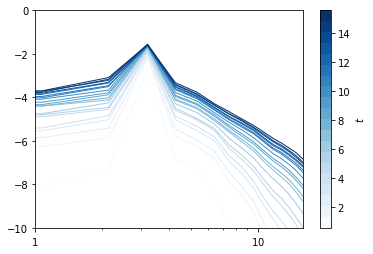

In [14]:
# Plot:
f, ax = plt.subplots()
ax.set_xscale('log') 
plt.axis([1, np.nanmax(k), -10, 0])
plt.xticks([1, 10], ['$1$','$10$'])

# Create line colors and modified colormap
numberofplotspec = 20
colors = [plt.cm.Blues(i) for i in np.linspace(0, 1, numberofplotspec)]
mycolormap = ListedColormap(colors)
from cycler import cycler
ax.set_prop_cycle(cycler('color', colors))

# Find the spectra that have equal log-distance in time:
ideallogspace = np.linspace(tspec[0], tspec[maxspec-1], num=numberofplotspec)
plotarray = []
plotarrayindex = []
j = 0
jspec = 0
for j in range(numberofplotspec):
  jspec = np.abs(tspec - ideallogspace[j]).argmin()
  plotarrayindex.append(jspec)
  plotarray.append(tspec[jspec])

n=0
i=0
for i in plotarrayindex:  # distances in log space
    ax.plot(k, np.log10(pkin[i]), color=colors[n], linewidth=1)
    n = n+1
    
# color bar
mintime = p.t[0]
maxtime = p.t[maxspec-1]
a = np.array([[mintime,maxtime]])
i = ax.imshow(a, cmap=mycolormap,aspect='auto')
i.set_visible(False) # don't show data of colorbar
f.colorbar(i, label='$t$', ax=ax)  # note that colorbar is a method of the figure, not the axes
